In [76]:
import pickle
from tqdm import tqdm
from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas
import math

In [59]:
df = pandas.read_excel("./companies_data.xlsx")
pdf = pandas.read_csv("./data.csv")
pdf.dropna(subset=["abstract", "title", "subject_areas"], inplace=True)

In [71]:
company_encode = []

#model = SentenceTransformer('all-mpnet-base-v2')

with open("./model.pkl", 'rb') as file:
        model = pickle.load(file)

for company in df["business_summary"].tolist():
    e1 = model.encode(company, convert_to_tensor=True)
    company_encode.append(e1)
    
df["vector"] = company_encode

df.to_pickle("./company_vector.pkl")



In [64]:
with open("./model.pkl", "wb") as f:
    pickle.dump(model, f)

In [69]:
data_encode = []

with open("./model.pkl", 'rb') as file:
        model = pickle.load(file)

for abstract in pdf["abstract"].tolist():
    e1 = model.encode(abstract, convert_to_tensor=True)
    data_encode.append(e1)
    
pdf["vector"] = data_encode

pdf

,eid,title,abstract,doi,publication_name,cover_date,citedby_count,author_ids,subject_areas,affiliations,vector
0,2-s2.0-85066074915,Health and disease concepts: an approach to he...,Purpose: Health for all is an ideal goal that ...,10.1108/JHR-08-2018-045,Journal of Health Research,2018-11-07,1,['12041813500'],"['Health Policy', 'Public Health, Environmenta...",[],"[tensor(0.0313, device='cuda:0'), tensor(0.024..."
1,2-s2.0-85048018727,Examining the relationships between HR practic...,Purpose: The purpose of this paper is to exten...,10.1108/APJBA-11-2017-0114,Asia-Pacific Journal of Business Administration,2018-11-06,23,['12140303400'],"['Business, Management and Accounting (all)', ...",[],"[tensor(0.0224, device='cuda:0'), tensor(-0.06..."
2,2-s2.0-85061255485,Investigation of instructional design on readi...,This research aims to investigate the current ...,10.1145/3291078.3291100,ACM International Conference Proceeding Series,2018-11-05,3,"['57205711115', '56119381800', '6505939223']","['Software', 'Human-Computer Interaction', 'Co...","[{'afid': None, 'name': 'Chulalongkorn Univers...","[tensor(0.0282, device='cuda:0'), tensor(-0.09..."
3,2-s2.0-85054896135,Results of a real-world study on vortioxetine ...,Objective: The REVIDA study aimed to assess th...,10.1080/03007995.2018.1477746,Current Medical Research and Opinion,2018-11-02,12,"['57204192635', '7004330084', '56021778200', '...",['Medicine (all)'],"[{'afid': None, 'name': 'Makati Medical Center...","[tensor(0.0417, device='cuda:0'), tensor(0.001..."
4,2-s2.0-85056159676,Optical Properties of Individual Aragonite Pla...,The unique structural architecture of nacre fr...,10.1002/slct.201801566,ChemistrySelect,2018-11-08,4,"['55237949400', '50462130300', '26538365800', ...",['Chemistry (all)'],"[{'afid': None, 'name': 'Chulalongkorn Univers...","[tensor(0.0777, device='cuda:0'), tensor(0.032..."
...,...,...,...,...,...,...,...,...,...,...,...
20210,2-s2.0-85121585004,Comparison of the effect of hot and thermo-neu...,Exercise training is recommended to promote en...,10.48048/tis.2021.394,Trends in Sciences,2021-11-01,0,"['57382685800', '6508138646', '57193800471']",['Multidisciplinary'],"[{'afid': None, 'name': 'Chulalongkorn Univers...","[tensor(0.0103, device='cuda:0'), tensor(0.002..."
20211,2-s2.0-85120995424,Measurement of prompt open-charm production cr...,The production cross sections for prompt open-...,10.1007/JHEP11(2021)225,Journal of High Energy Physics,2021-11-01,2,"['35222495600', '56217303000', '57195404626', ...",['Nuclear and High Energy Physics'],"[{'afid': None, 'name': 'Rheinisch-Westfälisch...","[tensor(-0.0216, device='cuda:0'), tensor(-0.0..."
20212,2-s2.0-85120069769,Complete genome sequences of mycobacterium far...,Mycobacterium farcinogenes is a nonchromogenic...,10.1128/MRA.01005-21,Microbiology Resource Announcements,2021-11-01,0,"['24481984300', '35208717600', '12783320200', ...","['Molecular Biology', 'Immunology and Microbio...","[{'afid': None, 'name': 'Chulalongkorn Univers...","[tensor(0.0576, device='cuda:0'), tensor(0.049..."
20213,2-s2.0-85120059914,Adaptability of siamese rosewood and teak seed...,"Rosewood and Teak are valuable timber species,...",10.32526/ennrj/19/202100003,Environment and Natural Resources Journal,2021-11-01,2,"['54897960400', '57220119760', '25721817900']",['Environmental Science (all)'],"[{'afid': None, 'name': 'Chulalongkorn Univers...","[tensor(-0.0193, device='cuda:0'), tensor(-0.0..."


In [70]:
pdf.to_pickle("./data_vector.pkl")

In [73]:
pdf = pandas.read_pickle("./data_vector.pkl")
df = pandas.read_pickle("./company_vector.pkl")
df

,company_name,sector,industry,market_cap,business_summary,risks,strategy,vector
0,Delta Electronics (Thailand) Public Company Li...,Industrials,Electrical Equipment & Parts,2482289508352,Delta Electronics (Thailand) Public Company Li...,NaN,NaN,"[tensor(0.0138, device='cuda:0'), tensor(-0.06..."
1,Advanced Info Service Public Company Limited,Communication Services,Telecom Services,910108196864,Advanced Info Service Public Company Limited o...,NaN,NaN,"[tensor(0.0455, device='cuda:0'), tensor(-0.04..."
2,PTT Public Company Limited,Energy,Oil & Gas Integrated,899297640448,PTT Public Company Limited engages in petroleu...,NaN,NaN,"[tensor(0.0361, device='cuda:0'), tensor(-0.04..."
3,Airports of Thailand Public Company Limited,Industrials,Airports & Air Services,757142126592,"Airports of Thailand Public Company Limited, t...",NaN,NaN,"[tensor(0.0284, device='cuda:0'), tensor(-0.04..."
4,Gulf Development Public Company Limited,Utilities,Utilities - Independent Power Producers,605063413760,Gulf Development Public Company Limited genera...,NaN,NaN,"[tensor(0.0180, device='cuda:0'), tensor(-0.01..."
...,...,...,...,...,...,...,...,...
89,Forth Corporation Public Company Limited,Industrials,Conglomerates,6173473280,"Forth Corporation Public Company Limited, toge...",NaN,NaN,"[tensor(0.0525, device='cuda:0'), tensor(-0.08..."
90,The ONE Enterprise Public Company Limited,Communication Services,Entertainment,5095875584,The ONE Enterprise Public Company Limited enga...,NaN,NaN,"[tensor(0.0274, device='cuda:0'), tensor(-0.01..."
91,Major Cineplex Group Public Company Limited,Communication Services,Entertainment,5002260480,"Major Cineplex Group Public Company Limited, t...",NaN,NaN,"[tensor(0.0469, device='cuda:0'), tensor(-0.02..."
92,Beyond Securities Public Company Limited,Financial Services,Capital Markets,2761633024,Beyond Securities Public Company Limited engag...,NaN,NaN,"[tensor(0.0341, device='cuda:0'), tensor(-0.03..."


In [74]:
pdf

,eid,title,abstract,doi,publication_name,cover_date,citedby_count,author_ids,subject_areas,affiliations,vector
0,2-s2.0-85066074915,Health and disease concepts: an approach to he...,Purpose: Health for all is an ideal goal that ...,10.1108/JHR-08-2018-045,Journal of Health Research,2018-11-07,1,['12041813500'],"['Health Policy', 'Public Health, Environmenta...",[],"[tensor(0.0313, device='cuda:0'), tensor(0.024..."
1,2-s2.0-85048018727,Examining the relationships between HR practic...,Purpose: The purpose of this paper is to exten...,10.1108/APJBA-11-2017-0114,Asia-Pacific Journal of Business Administration,2018-11-06,23,['12140303400'],"['Business, Management and Accounting (all)', ...",[],"[tensor(0.0224, device='cuda:0'), tensor(-0.06..."
2,2-s2.0-85061255485,Investigation of instructional design on readi...,This research aims to investigate the current ...,10.1145/3291078.3291100,ACM International Conference Proceeding Series,2018-11-05,3,"['57205711115', '56119381800', '6505939223']","['Software', 'Human-Computer Interaction', 'Co...","[{'afid': None, 'name': 'Chulalongkorn Univers...","[tensor(0.0282, device='cuda:0'), tensor(-0.09..."
3,2-s2.0-85054896135,Results of a real-world study on vortioxetine ...,Objective: The REVIDA study aimed to assess th...,10.1080/03007995.2018.1477746,Current Medical Research and Opinion,2018-11-02,12,"['57204192635', '7004330084', '56021778200', '...",['Medicine (all)'],"[{'afid': None, 'name': 'Makati Medical Center...","[tensor(0.0417, device='cuda:0'), tensor(0.001..."
4,2-s2.0-85056159676,Optical Properties of Individual Aragonite Pla...,The unique structural architecture of nacre fr...,10.1002/slct.201801566,ChemistrySelect,2018-11-08,4,"['55237949400', '50462130300', '26538365800', ...",['Chemistry (all)'],"[{'afid': None, 'name': 'Chulalongkorn Univers...","[tensor(0.0777, device='cuda:0'), tensor(0.032..."
...,...,...,...,...,...,...,...,...,...,...,...
20210,2-s2.0-85121585004,Comparison of the effect of hot and thermo-neu...,Exercise training is recommended to promote en...,10.48048/tis.2021.394,Trends in Sciences,2021-11-01,0,"['57382685800', '6508138646', '57193800471']",['Multidisciplinary'],"[{'afid': None, 'name': 'Chulalongkorn Univers...","[tensor(0.0103, device='cuda:0'), tensor(0.002..."
20211,2-s2.0-85120995424,Measurement of prompt open-charm production cr...,The production cross sections for prompt open-...,10.1007/JHEP11(2021)225,Journal of High Energy Physics,2021-11-01,2,"['35222495600', '56217303000', '57195404626', ...",['Nuclear and High Energy Physics'],"[{'afid': None, 'name': 'Rheinisch-Westfälisch...","[tensor(-0.0216, device='cuda:0'), tensor(-0.0..."
20212,2-s2.0-85120069769,Complete genome sequences of mycobacterium far...,Mycobacterium farcinogenes is a nonchromogenic...,10.1128/MRA.01005-21,Microbiology Resource Announcements,2021-11-01,0,"['24481984300', '35208717600', '12783320200', ...","['Molecular Biology', 'Immunology and Microbio...","[{'afid': None, 'name': 'Chulalongkorn Univers...","[tensor(0.0576, device='cuda:0'), tensor(0.049..."
20213,2-s2.0-85120059914,Adaptability of siamese rosewood and teak seed...,"Rosewood and Teak are valuable timber species,...",10.32526/ennrj/19/202100003,Environment and Natural Resources Journal,2021-11-01,2,"['54897960400', '57220119760', '25721817900']",['Environmental Science (all)'],"[{'afid': None, 'name': 'Chulalongkorn Univers...","[tensor(-0.0193, device='cuda:0'), tensor(-0.0..."


In [77]:
# Load a Sentence-BERT model (optimized for similarity)
with open("./model.pkl", 'rb') as file:
    model = pickle.load(file)

# Two example paragraphs
'''
p1n = ["mckinsey", "tsmc", "rivian", "meta", "phillips"]
p1s =["To help our clients make distinctive, lasting, and substantial improvements in their performance and to build a great firm that attracts, develops, excites, and retains exceptional people.", "Our vision is to be the most advanced and largest technology and foundry services provider to fabless companies and IDMs, and in partnership with them, to forge a powerful competitive force in the semiconductor industry.", "To create a sustainable future by leading the way in emissions-free transportation and inspiring people to explore the world responsibly (Rivian, 2024). Rivian is an innovator of electric vehicles that is filling an adventurous niche market by manufacturing stylish off-roading SUVs and pickup truck vehicles in a sustainable way that encourages its customers to be adventurous. This enables their customers with the confidence of knowing that their vehicle is reliable, and performance based to them on any adventure they are looking for", "Build the future of human connection and the technology that makes it possible, by building technology that connects you to people, interests and experiences that matter to you. Our principles embody what we stand for and guide our approach to how we build.", "our purpose is to improve people’s health and well-being through meaningful innovation. We aim to improve 2.5 billion lives per year by 2030, including 400 million in underserved communities."] 
'''

p1n = df["company_name"].tolist()
p1s = df["vector"].tolist()

p2s = pdf["vector"].tolist()
p2n = pdf["title"].tolist()
p2a = pdf["subject_areas"].tolist()


comp_company = []
comp_title = []
comp_area = []
comp_value = []


i1 = 0
i2 = 0

for p1 in tqdm(p1s, desc="p1"):
    for p2 in tqdm(p2s, desc="p2"):
        similarity = util.cos_sim(p1, p2).item()
        comp_company.append(p1n[i1])
        comp_title.append(p2n[i2])
        comp_value.append(similarity)
        comp_area.append(p2a[i2])
        i2 += 1
    i1 += 1
    i2 = 0
    
ndf = pandas.DataFrame({"company": comp_company, "title": comp_title, "areas": comp_area, "value": comp_value})


p1: 100%|██████████| 94/94 [05:36<00:00,  3.58s/it]


In [83]:
s = ndf["value"].tolist()
s.sort()

1837700

In [120]:
s = ndf["value"].to_numpy(dtype=float).reshape(-1, 1)
pt = PowerTransformer(method='yeo-johnson')
x_yj = pt.fit_transform(s)

# Store transformed column into dataframe for alignment
ndf["value_trans"] = x_yj

# Compute z-score within each company
ndf["z_by_company"] = ndf.groupby("company")["value"].transform(sts.zscore)

ptt = ndf.loc[ndf['company'] == 'Electricity Generating Public Company Limited', ["value"]]

valt = ptt["value"].tolist()

# Outliers: z > 3 *within company group*
df_highs = ndf[ndf["z_by_company"] > 3].copy()

df_highs.to_csv("./nonnormalized_complete.csv")
df_highs

,company,title,areas,value,value_trans,z_by_company
55,Delta Electronics (Thailand) Public Company Li...,Innovative PLC training laboratory for develop...,"['Computer Networks and Communications', 'Comp...",0.384894,2.826180,3.935315
452,Delta Electronics (Thailand) Public Company Li...,Students' perceptions of makerspaces and learn...,"['Computer Networks and Communications', 'Ener...",0.314313,2.422818,3.056941
580,Delta Electronics (Thailand) Public Company Li...,Standardized the natural gas data for Thailand...,['Energy (all)'],0.425690,3.030390,4.443019
710,Delta Electronics (Thailand) Public Company Li...,Quantification and characterization of recover...,"['Environmental Engineering', 'Waste Managemen...",0.354112,2.658652,3.552235
1151,Delta Electronics (Thailand) Public Company Li...,Reducing misclassification of true defects in ...,['Artificial Intelligence'],0.333351,2.538486,3.293869
...,...,...,...,...,...,...
1837230,KEX Express (Thailand) Public Company Limited,Security studies in Thailand,['Social Sciences (all)'],0.248280,1.976075,3.049469
1837231,KEX Express (Thailand) Public Company Limited,European studies in Thailand,['Social Sciences (all)'],0.271107,2.139067,3.383732
1837235,KEX Express (Thailand) Public Company Limited,Introduction,['Social Sciences (all)'],0.264594,2.093538,3.288365
1837263,KEX Express (Thailand) Public Company Limited,Polydrug use among kratom users: Findings from...,"['Medicine (miscellaneous)', 'Health (social s...",0.259174,2.055055,3.208984


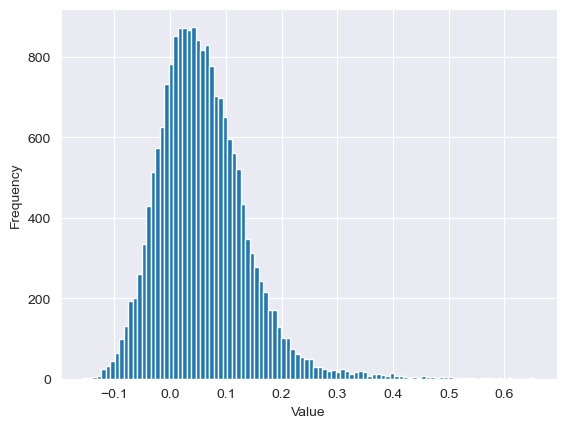

In [113]:

plt.hist(valt, bins=100)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [53]:
len(s)

19551